### Импортируем библиотеки

In [2]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [1]:
import pymongo
import pandas as pd
import urllib.request as req
import json
import psycopg2
import sqlalchemy


### Оюзор таблицы hr_dataset

In [8]:
hr_dataset = pd.read_sql('select * from hr_dataset',connect)
hr_dataset

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,"Navathe, Kurt",1009919960,0,0,1,1,3,3,48,...,2017-02-10,289,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,307,"Wang, Charlie",1009919970,0,0,1,1,3,3,36,...,2017-02-15,284,None,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,308,"Smith, Jason",1009919980,0,0,1,1,3,3,34,...,2017-02-15,284,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,309,"Westinghouse, Matthew",1009919990,1,1,1,1,3,3,30,...,2017-04-20,220,None,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


#### Корреляции с отделами работников

In [80]:
department = pd.read_sql(
   'SELECT department, \
    COUNT(genderid) AS count_employee, \
    COUNT(CASE WHEN genderid = 0 THEN 1 END) AS female, \
    COUNT(CASE WHEN genderid = 1 THEN 1 END) AS male, \
    MEDIAN(age) AS median_age, \
    MEDIAN("Days Employed") AS median_days_employed, \
    COUNT(CASE WHEN "Date of Termination" IS NOT NULL THEN 1 END) AS count_term\
    FROM hr_dataset \
    GROUP BY department',
    connect)
department

,department,count_employee,female,male,median_age,median_days_employed,count_term
0,Production,208,127,81,38.0,1327.0,83
1,Admin Offices,10,6,4,31.5,1084.0,3
2,IT/IS,50,22,28,36.0,972.0,10
3,Executive Office,1,1,0,63.0,1973.0,0
4,Software Engineering,10,6,4,34.5,1438.0,3
5,Sales,31,15,16,36.0,1301.0,4


И так с помощью данного запроса, мы проверяли, возможные зависимости какого-либо фактора от отделов работников.
Описание данных:

    Пол сотрудника не зависит от отдела работника.
Видно, что господствующего пола по отделам нет, однако отдел "production" выделяется количеством женщин по сравнению с количеством работников-мужчин но лишь в соотношении три к двум.

    Средний возраст также не показывает никаких явных зависимостей. 
Возможно более исчерпывающую информацию можно получить построив график разпределения возрастов по отделам.

    Зависисмость продолжительности работы от отдела.
Опять же никаких выделяющихся показателей нет, но так или иначе данные нам дают маршрут для размышления. В целом показатели высокие, но вот средняя продолжительность работы в отделах Admin Offices и IT/IS не превышает трёх лет. Возможно это связано с тем, что отделы сформировались сравнительно недавно, а возможно на данный показатель повлияла продолжительность работы уволенных сотрудников.
    
    Зависимость количества уволенных сотрудников.
При средней продолжительности работы чуть меньше четырех лет в отделе Production было уволено 83 человека, что в первую очередь бросается в глаза. Такие данные также требуют дальнейшего изучения. Говорить о явной зависимости разумеется нельзя, так как, на эти увольнения повлияли другие факторы, а не сам отдел (возможно начальник, или особенно низкие оценки работников)


    
    
  
    

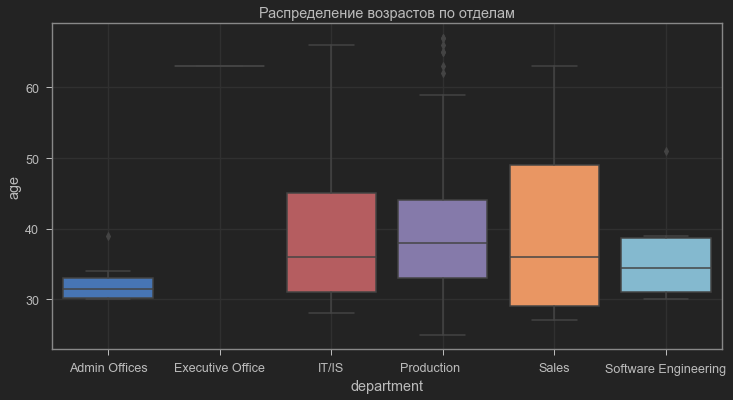

In [33]:
depart_age = pd.read_sql('SELECT department, age \
                         FROM hr_dataset \
                         ORDER BY department', connect)
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=depart_age, x=depart_age['department'], y=depart_age['age'], ax=ax)
ax.set_title('Распределение возрастов по отделам')
plt.grid()

        распределение возрастов по отделам
Наглядно прослеживается факт того, что в компании преимущественно работают люди старше тридцати лет. Так напрмер можно сделать вывод, что в "Admin Offices" и "Software Engineering" работают люди преимущественно от 30 до 40 лет. В других отделах возраста сотрудников захватывают больший интервал.

#### Корелляции оценок

Text(0.5, 1.0, 'Зависимость оценки от продолжительности работы')

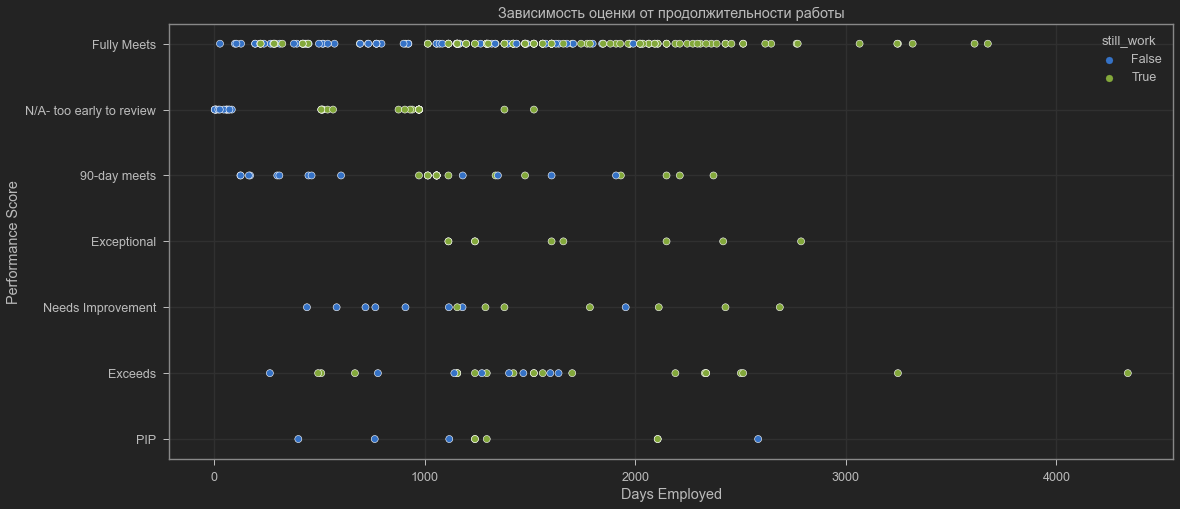

In [38]:
days_score = pd.read_sql('SELECT ("Date of Termination" IS NULL) AS still_work, "Days Employed", "Performance Score" FROM hr_dataset',connect)

fig, ax = plt.subplots(figsize=(18,8))
sns.scatterplot(data=days_score, y='Performance Score', x='Days Employed', hue='still_work')
plt.grid()

ax.set_title('Зависимость оценки от продолжительности работы')

    Зависимость оценки от продолжительности работы
Явно бросается в глаза несовпадение в отметке испытательного срока. Сотрудники продолжительностью работы свыше трёх месяцев по-прежнему не получили совей оценки продуктивности.
Также и для сотрудников у которых вместо оценки "Слишком рано для выставления оценки". Почему-то такая категория распростаняется и на работников, которые находятся в коллективе боле года.

Анализ показал также, что сотрудники, которые работают меньше трёх лет не добиваются оценки "Exceptional". Также интересно, что никто из получивших данную оценку не уволился, скорее всего они действительно заинтресованы в своей должности.

    Более того можно проследить зависимость между продолжительностью работы сотрудника и увольнениями.

Заметно, что чем дольше работают сотрудники, тем реже они увольняются.

Так, например, количество увольнений после пересечения границы в 2000 дней (5,5 лет) количество уволенных сотрудников резко упало.

И, конечно, очень просто заметить, что эпицентр увольнений лежит в границах до 1000/1500 дней.

Text(0, 0.5, 'Количество сотрудников в процентах')

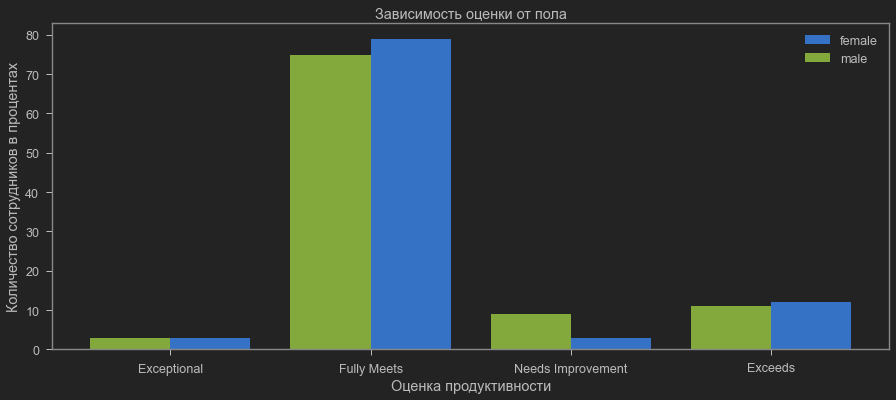

In [71]:
gender_score = pd.read_sql('SELECT "Performance Score", \
                           ((COUNT(CASE WHEN genderid=0 THEN 1 END))*100)/(SELECT COUNT(CASE WHEN genderid=0 THEN 1 END) FROM hr_dataset WHERE perf_scoreid in (2, 3, 4, 5)) AS Female,\
                           ((COUNT(CASE WHEN genderid=1 THEN 1 END))*100)/(SELECT COUNT(CASE WHEN genderid=1 THEN 1 END) FROM hr_dataset WHERE perf_scoreid in (2, 3, 4, 5)) AS Male \
                           FROM hr_dataset\
                           WHERE perf_scoreid in (2, 3, 4, 5)\
                           GROUP BY "Performance Score"',connect)

fig, ax = plt.subplots(figsize=(15,6))
plt.bar(data=gender_score, x='Performance Score', height='female', width=0.4, align='edge')
plt.bar(data=gender_score, x='Performance Score', height='male', width=-0.4, align='edge')
plt.legend(['female', 'male'])
ax.set_title('Зависимость оценки от пола')
ax.set_xlabel('Оценка продуктивности')
ax.set_ylabel('Количество сотрудников в процентах')

    Зависимоть оценки от пола
Здесь и далее следует рассматривать только оценки "Exceptional", "Fully Meets", "Exceeds", "Needs Improvement", так как остальные не отражают продуктивность работника.
Также мы рассматриваем лишь процентное распределение среди тех, кто попал в данные категории

Так мы можем заметить явное превосходство сотрудниц по положительным оценкам. Мужская часть коллектива имеет более высокий показатель только по группе "Needs Improvement"

Text(0, 0.5, 'Количество сотрудников в процентах')

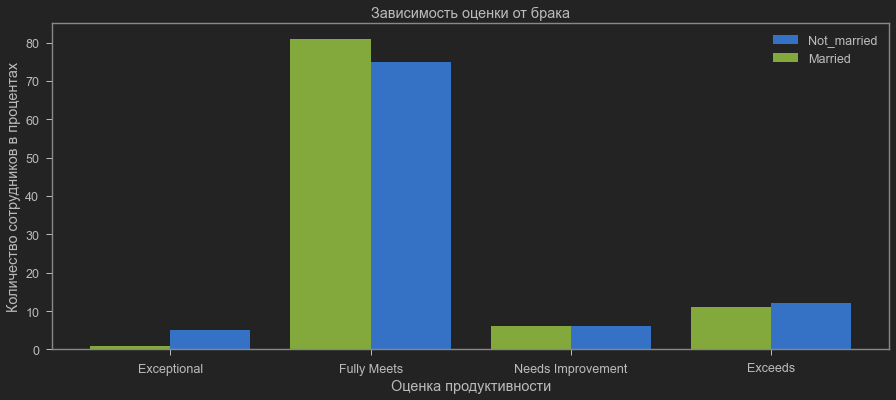

In [72]:
married_score = pd.read_sql('SELECT "Performance Score", \
                           ((COUNT(CASE WHEN marriedid=0 THEN 1 END))*100)/(SELECT COUNT(CASE WHEN marriedid=0 THEN 1 END) FROM hr_dataset WHERE perf_scoreid in (2, 3, 4, 5)) AS Not_married,\
                           ((COUNT(CASE WHEN marriedid=1 THEN 1 END))*100)/(SELECT COUNT(CASE WHEN marriedid=1 THEN 1 END) FROM hr_dataset WHERE perf_scoreid in (2, 3, 4, 5)) AS Married \
                           FROM hr_dataset\
                           WHERE perf_scoreid in (2, 3, 4, 5)\
                           GROUP BY "Performance Score"',connect)

fig, ax = plt.subplots(figsize=(15,6))
plt.bar(data=married_score, x='Performance Score', height='not_married', width=0.4, align='edge')
plt.bar(data=married_score, x='Performance Score', height='married', width=-0.4, align='edge')
plt.legend(['Not_married', 'Married'])
ax.set_title('Зависимость оценки от брака')
ax.set_xlabel('Оценка продуктивности')
ax.set_ylabel('Количество сотрудников в процентах')

    Зависимость оценки от наличия брака
Можно точно выделить тенденцию превосходства количества не состоящих в браке сотрудников по показателю "Exceptional". 
Также состоящие в браке сотрудники имеют более высокий показатель по удовлетворительной продуктивности.
Остальные категории примерно равные.

Text(0, 0.5, 'Возраст сотрудников')

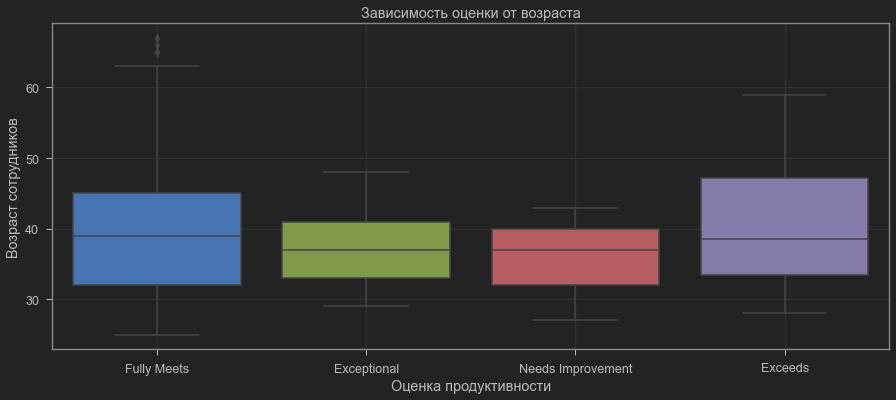

In [78]:
age_score = pd.read_sql('SELECT "Performance Score", age\
                        FROM hr_dataset\
                        WHERE perf_scoreid in (2, 3, 4, 5)',connect)

age_score

fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=age_score, x='Performance Score', y='age')
plt.grid()

ax.set_title('Зависимость оценки от возраста')
ax.set_xlabel('Оценка продуктивности')
ax.set_ylabel('Возраст сотрудников')

    Зависимость оценки от возраста
Очевидно можно сказать, что сотрудники страше 43 лет не получают неудовлетворительные оценки.
Также среди сотрудников сладше 30 лет редко встречаются те, кто получают оценку "Exceed" или "Exceptional" (что является показателями выше "удовлетворительно")

In [45]:
manager_score = pd.read_sql('SELECT "Manager Name",\
                            COUNT(CASE WHEN perf_scoreid = 2 THEN 1 END) AS Needs_Improvement,\
                            COUNT(CASE WHEN perf_scoreid = 3 THEN 1 END)  AS Fully_Meets,\
                            COUNT(CASE WHEN perf_scoreid = 4 THEN 1 END)  AS Exceeds,\
                            COUNT(CASE WHEN perf_scoreid = 5 THEN 1 END)  AS Exceptional\
                            FROM hr_dataset\
                            GROUP BY "Manager Name"\
                            ORDER BY needs_improvement', connect)
manager_score

,Manager Name,needs_improvement,fully_meets,exceeds,exceptional
0,Brian Champaigne,0,8,0,0
1,Amy Dunn,0,11,2,1
2,David Stanley,0,15,1,0
3,Peter Monroe,0,6,0,0
4,Eric Dougall,0,3,1,0
5,Simon Roup,0,6,0,2
6,Kelley Spirea,0,15,3,0
7,Brandon R. LeBlanc,0,4,0,0
8,Board of Directors,0,2,0,0
9,Lynn Daneault,0,8,2,0


    Зависимость оценки от руководителя
Заметно, что оценки распределены нормально и среди руководителей нет тенденций выставлять преимущественно низкие или высокие оценки

#### Продолжительности работы

([<matplotlib.axis.XTick at 0x1c0ede36e20>,
 [Text(0, 0, 'Не состоит в браке'), Text(1, 0, 'В браке')])

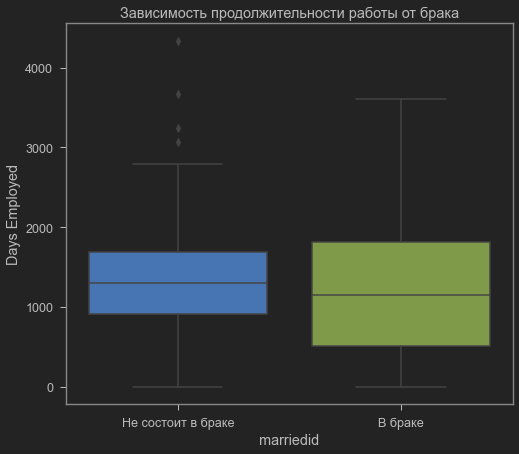

In [4]:
duration_married = pd.read_sql('SELECT "Days Employed", marriedid FROM hr_dataset', connect)

# fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=duration_married, x='marriedid', y='Days Employed')
plt.title('Зависимость продолжительности работы от брака')
plt.xticks(ticks=[0,1], labels=['Не состоит в браке', 'В браке'])

    Зависимость продолжительности работы от брака
На данном графике можно заметить отсутствие превосходства одной категории над другой. Зависимостей не обнаружено.

([<matplotlib.axis.XTick at 0x1c0ee07f940>,
 [Text(0, 0, 'Женщины'), Text(1, 0, 'Мужчины')])

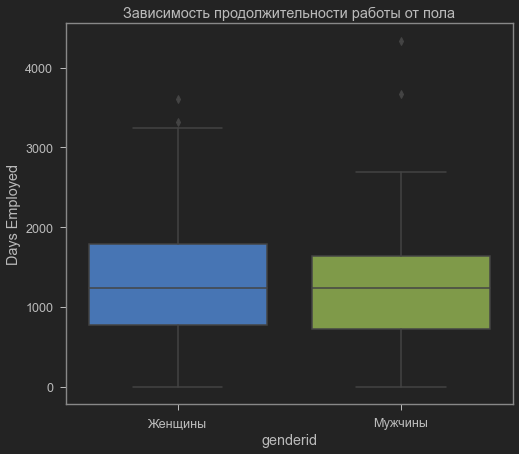

In [5]:
duration_gender = pd.read_sql('SELECT "Days Employed", genderid FROM hr_dataset', connect)

# fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=duration_gender, x='genderid', y='Days Employed')
plt.title('Зависимость продолжительности работы от пола')
plt.xticks(ticks=[0,1], labels=['Женщины', 'Мужчины'])

    Зависимость продолжительности работы от пола
Можно заметить что сотрудниц, работающих дольше семи лет (около 2500 дней) несколько больше чем мужчин. Однако самые высокие показатели по продолжительности показывают именно мужчины.  

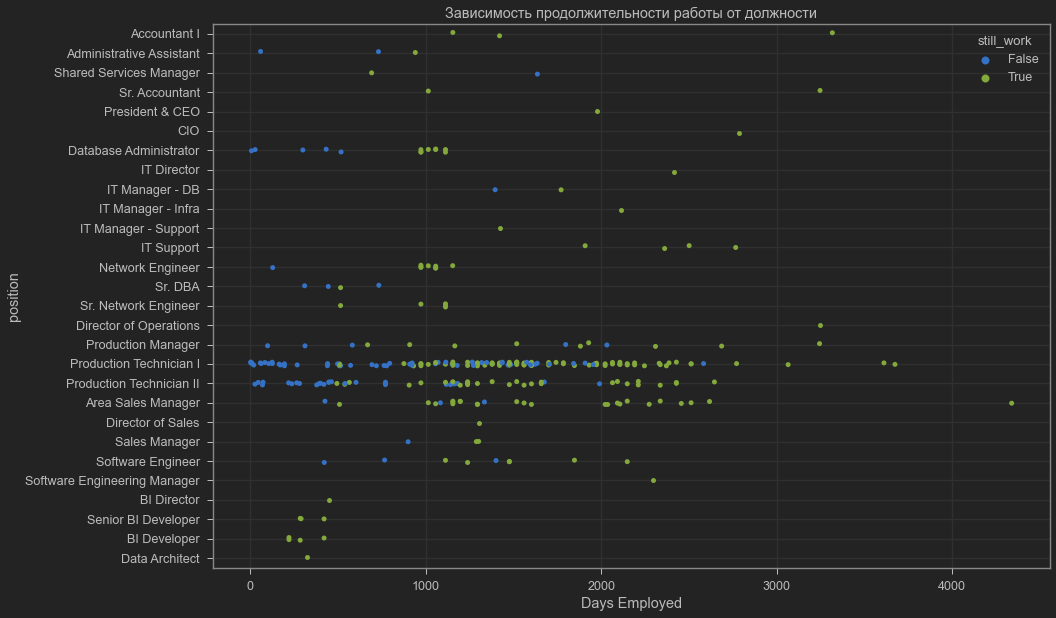

In [82]:
duration_position = pd.read_sql('SELECT "Days Employed", position, ("Date of Termination" IS NULL) AS still_work FROM hr_dataset', connect)

fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(data=duration_position, y='position', x ='Days Employed', hue='still_work')
plt.title('Зависимость продолжительности работы от должности')
plt.grid()

    Зависимость продолжительности работы от должности
По графику заметно, что очень много увольнений приходится на две позиции: "Production Technician 1" и "Production Technician 2".

Так же в большинстве должностей увольнения скооперированы на первых трёх годах работы (до 1000 дней).  

#### Причина увольнения

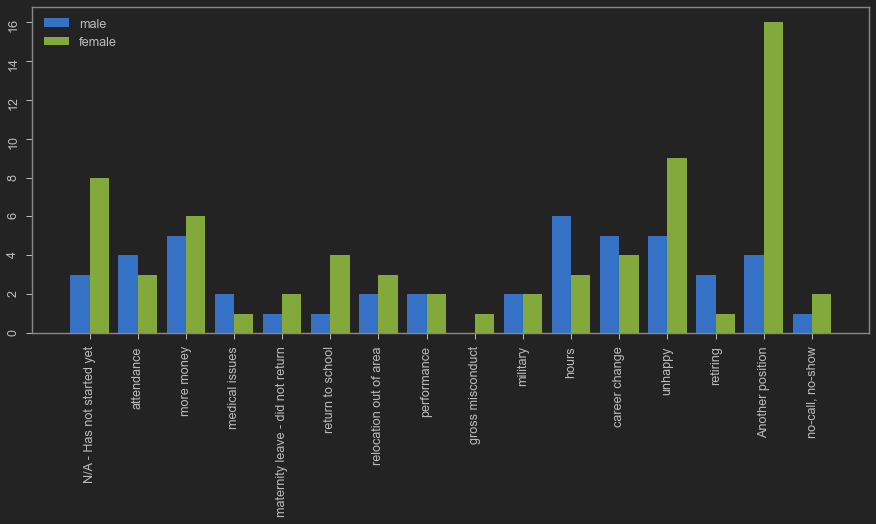

In [67]:
term_gender = pd.read_sql('''SELECT "Reason For Term" as Reason, \
                COUNT(CASE WHEN genderid=0 THEN 1 END) as female, \
                COUNT(CASE WHEN genderid=1 THEN 1 END) as male \
                FROM hr_dataset\
                WHERE "Reason For Term" <> 'N/A - still employed'\
                GROUP BY "Reason For Term"\
                ''', connect)
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(data=term_gender, x='reason', height='male', width=-0.4, align='edge')
plt.bar(data=term_gender, x='reason', height='female', width=0.4, align='edge')
plt.legend(['male', 'female'])
ax.tick_params(rotation=90)

    Зависимость причины увольнения от пола
В данном графике можно заметить лишь то, что женщины чаще увольняются всвязи со сменой должности

Text(0, 0.5, 'Количество сотрудников в процентах')

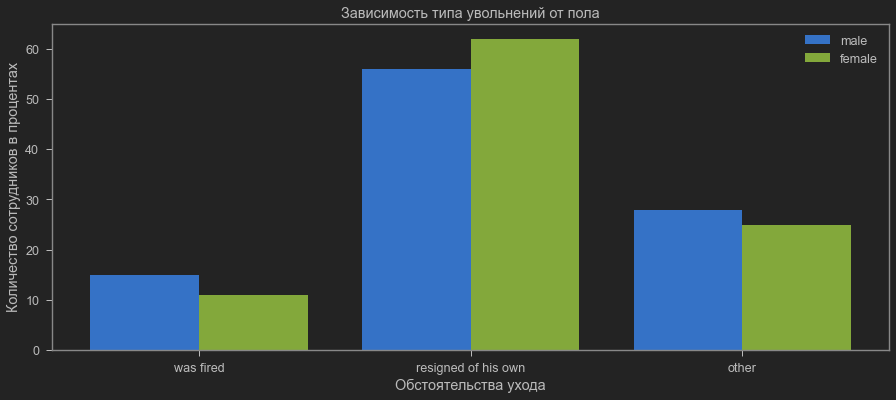

In [92]:
reason_type_gender = pd.read_sql('''SELECT 
                ((COUNT(CASE WHEN genderid=0 THEN 1 END))*100)/(SELECT COUNT(CASE WHEN genderid=0 THEN 1 END) FROM hr_dataset WHERE "Reason For Term" <> 'N/A - still employed') AS Female,\
                ((COUNT(CASE WHEN genderid=1 THEN 1 END))*100)/(SELECT COUNT(CASE WHEN genderid=1 THEN 1 END) FROM hr_dataset WHERE "Reason For Term" <> 'N/A - still employed') AS Male, \
                CASE 
                WHEN "Reason For Term" IN ('attendance', 'performance', 'gross misconduct', 'no-call, no-show') 
                    THEN 'was fired' 
                WHEN "Reason For Term" IN ('more money', 'return to school', 'hours', 'unhappy', 'career change', 'Another position') 
                    THEN 'resigned of his own'
                WHEN "Reason For Term" IN ('medical issues', 'maternity leave - did not return', 'relocation out of area', 'military', 'retiring', 'N/A - Has not started yet') 
                    THEN 'other'
                END AS type
                FROM hr_dataset
                WHERE "Reason For Term" <> 'N/A - still employed'
                GROUP BY "type"
                ''', connect)
reason_type_gender

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(data=reason_type_gender, x='type', height='male', width=-0.4, align='edge')
plt.bar(data=reason_type_gender, x='type', height='female', width=0.4, align='edge')
plt.legend(['male', 'female'])
plt.title('Зависимость типа увольнений от пола')
plt.xlabel('Обстоятельства ухода')
plt.ylabel('Количество сотрудников в процентах')

    Зависимость типа увольнений от пола

Было бы интереснее разделить причины увольнения на "уволился по собственному желанию" и "уволен", также есть категоря "другое", вклучающая в себя различные обстоятельства, повлиявшие на увольнение, такие как "болезнь", "увольнение после декретного отпуска", "переезд", "уход на пенсию" и другие.

Уход по собственному желанию означает отсутствие каких-либо обстоятельств для увольнения кроме собственных желаний таких как желание получать бОльшую заработную плату, продолжить обучение или сотрудник не получает удовольствие от данной работы.

Кластер "Уволен" включает в себя какие-либо дисциплинарные нарушения на работе или некачественную работу.

Далее стоит уточнить, что показатели указаны в процентном соотношении.

Теперь можно заметить, более половины и мужчин и женщин уходит по собственному желанию и лишь 15 и 11 процентов соответственно были уволены.

Также на графике заметно, что девушки чаще уходят по собственному желанию чем мужчины и реже становятся уволенными


Text(0.5, 1.0, 'Зависимость даты увольнения от причины увольнения')

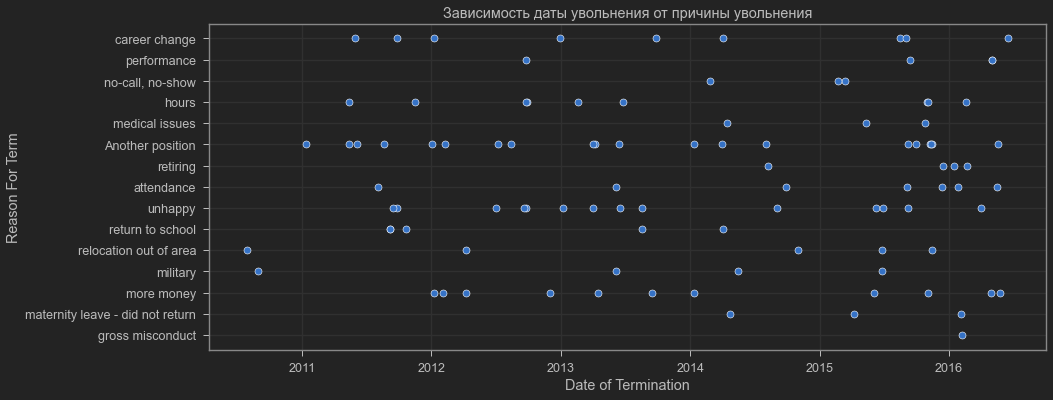

In [99]:
date_reason = pd.read_sql(''' SELECT "Date of Termination", "Reason For Term"  
                              FROM hr_dataset 
                              WHERE "Reason For Term" <> 'N/A - still employed' AND "Date of Termination" IS NOT NULL  ''', connect)
fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=date_reason, x='Date of Termination', y="Reason For Term")
plt.grid()
ax.set_title('Зависимость даты увольнения от причины увольнения')

    Зависимость даты увольнения от причины увольнения 
Зависимости нет.

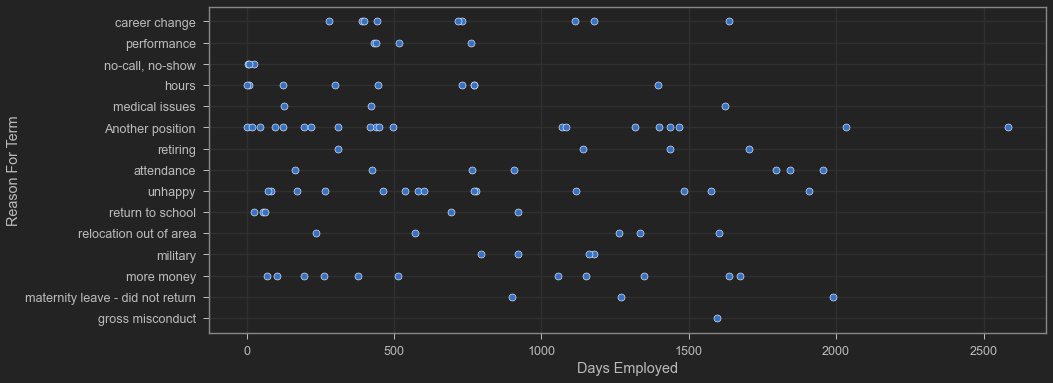

In [102]:
duration_reason = pd.read_sql(''' SELECT "Days Employed", "Reason For Term"  
                            FROM hr_dataset 
                            WHERE "Reason For Term" <> 'N/A - still employed' AND "Date of Termination" IS NOT NULL  ''', connect)

fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(data=duration_reason, x='Days Employed', y="Reason For Term")
plt.grid()
ax.set_title('Зависимость причины увольнения от продолжительности работы')

    Зависимость причины увольнения от продолжительности работы
Заметно, что "no-call, no-show" применима только к тем, кто недавно устроился, и данная причина не относится к тем, кто работает в компании давно

Также не особо большой разброс в продолжительности работы средит тех, кто уволен по причине "performance" : от года до двух. Возможно, это те люди, которые продолжительное время не могли изменить свой показатель "needs improvement".


### Обзор таблицы recruiting_costs


#### Ресурсы для рекрутинга

In [6]:
recruiting_costs = pd.read_sql('select * from recruiting_costs',connect)
recruiting_costs

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


In [7]:
recruiting = pd.read_sql('''SELECT "Employment Source", 
                                    MIN("Total") AS total, 
                                    COUNT("Employee Source") as count_people, 
                                    MIN("Total")/COUNT("Employee Source") AS pay_for_one
                            FROM recruiting_costs, hr_dataset
                            WHERE "Employment Source" = "Employee Source"
                            GROUP BY "Employment Source"
                            ORDER BY count_people''', connect)
recruiting


,Employment Source,total,count_people,pay_for_one
0,On-line Web application,0,1,0
1,Pay Per Click,1323,1,1323
2,Careerbuilder,7790,1,7790
3,Company Intranet - Partner,0,1,0
4,Information Session,0,4,0
5,Internet Search,0,6,0
6,Other,3995,9,443
7,Social Networks - Facebook Twitter etc,5573,11,506
8,On-campus Recruiting,7500,12,625
9,Word of Mouth,0,13,0


Можно бы было выдвинуть гипотезу о соответствии расходов на ресурс и количества сотрудников, пришедших благодаря данному ресурсу, но очевидно, что это не так.

Заметно, что есть ресурсы, которые обуславливают большой приток сотрудников, но в которые и вовсе не вкладываются никакие средства:

"Employee Referral" - 31 сотрудник

"Vendor Referral" - 15 сотрудников

"Glassdoor" -  14 сотрудников

Также есть такие ресурсы, на которые тратится в год большая сумма, но они обеспечивают сравнительно малое количество сотрудников. 

Например:

"Pay Per Click" - 1 сотрудник, сумма в год: 1323

"Careerbuilder" - 1 сотрудник, сумма в год: 7790


In [78]:
category_source = pd.read_sql('''SELECT
                                     COUNT("Employee Source") as count_people,
                                     SUM("Total") as total,
                                     SUM("Total")/COUNT("Employee Source") as pay_for_one,
                                     CASE 
                                         WHEN recruiting_costs.id IN (10, 15, 16, 18, 19, 21) THEN 'web'
                                         WHEN recruiting_costs.id IN (1, 2, 4, 9, 11, 14, 17) THEN 'not_internet'
                                     END AS source
                                 FROM recruiting_costs, hr_dataset
                                 WHERE "Employment Source" = "Employee Source" AND 
                                 (CASE 
                                     WHEN recruiting_costs.id IN (10, 15, 16, 18, 19, 21) THEN 'web'
                                     WHEN recruiting_costs.id IN (1, 2, 4, 9, 11, 14, 17) THEN 'not_internet'
                                 END) IS NOT NULL
                                 GROUP BY source ''', connect)
category_source

,count_people,total,pay_for_one,source
0,110,793324,7212,not_internet
1,95,496989,5231,web


Представленные данные помогут ответить на гипотезу, какой формат рекрутинга "посредством интернета" или без него более выгодный. (В данные категории входят только платные ресурсы)

Очевидно показатели рекрутинга без интернета по количеству нанятых сотрудников больше, однако при разнице всего в 15 человвек, на веб-рекрутинг затрачено намного меньше средств, что также отражается на показателе "pay for one".

Из этого можно сделать вывод, что платный рекрутинг в интернете намного эффективнее.

### Обзор таблицы salary_grid

In [47]:
salary_grid = pd.read_sql('''SELECT * FROM salary_grid''', connect)
salary_grid

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


In [79]:
term_salary = pd.read_sql('''SELECT "Position", 
                                     CASE WHEN count_term IS NULL THEN 0 ELSE count_term END, 
                                     "Hourly Min" 
                             FROM(
                                  (SELECT position, 
                                  COUNT("Date of Termination" IS NOT NULL) AS count_term 
                                  FROM hr_dataset 
                                  GROUP BY "position") a
                            RIGHT JOIN
                                  (SELECT "Hourly Min", "Position" 
                                  FROM salary_grid) b
                            ON "Position" = a.position
                                )
                            ORDER BY "Hourly Min"''', connect)
term_salary

,Position,count_term,Hourly Min
0,Production Technician I,136,14.42
1,Administrative Assistant,3,14.42
2,Sr. Administrative Assistant,0,16.83
3,Production Technician II,57,18.27
4,Accountant I,3,20.32
5,Lead Production Technician,0,21.63
6,Accountant II,0,24.27
7,Database Administrator,13,24.31
8,Network Engineer,9,24.44
9,Sr. Accountant,2,30.42


    Зависимость количества увольнений от оплаты труда
Гипотеза основывается на том, что чем меньше будет зарплата в час, тем больше будет количество увольнений, однако можно заметить, что это не полностью верное заявление.

Так или иначе, заметно, что большинство увольнений насчитывает позиция "Production Technician I", которая отличается самым маленьким почасовым окладом.

Однако позиция со столь же небольшим показателем зарплаты "Administrative Assistant" имеет только три увольнения.

Скорее всего такая разница связана с количеством необходимых сотрудников на данной позиции. 

In [81]:
score_salary = pd.read_sql('''SELECT Position, "Hourly Min", needs_improvement, fully_meets, exceeds, exceptional 
                   FROM ((SELECT position, 
                                 COUNT(CASE WHEN perf_scoreid = 2 THEN 1 END) AS needs_improvement,
                                 COUNT(CASE WHEN perf_scoreid = 3 THEN 1 END) AS fully_meets,
                                 COUNT(CASE WHEN perf_scoreid = 4 THEN 1 END) AS exceeds,
                                 COUNT(CASE WHEN perf_scoreid = 5 THEN 1 END) AS exceptional
                          FROM hr_dataset
                          GROUP BY Position) a
                          RIGHT JOIN
                              (SELECT "Position", "Hourly Min" FROM salary_grid) b
                          ON a.position = "Position")''',connect)
score_salary

,position,Hourly Min,needs_improvement,fully_meets,exceeds,exceptional
0,Administrative Assistant,14.42,0.0,1.0,0.0,0.0
1,None,16.83,NaN,NaN,NaN,NaN
2,Accountant I,20.32,0.0,3.0,0.0,0.0
3,None,24.27,NaN,NaN,NaN,NaN
4,Sr. Accountant,30.42,0.0,1.0,0.0,0.0
5,Network Engineer,24.44,0.0,4.0,0.0,0.0
6,Sr. Network Engineer,38.19,0.0,2.0,0.0,0.0
7,Database Administrator,24.31,0.0,4.0,0.0,2.0
8,Sr. DBA,44.65,0.0,2.0,0.0,0.0
9,Production Technician I,14.42,8.0,78.0,14.0,2.0


    Зависимость количества положительных оценок от зарплаты
Также как и в предыдущей гипотезе прямая зависимость не прослеживается. Количество положительных оценок также зависит и от количества сотрудников на данной позиции. 

### Обзор таблицы production_staff

In [82]:
production_staff = pd.read_sql('''SELECT * FROM production_staff''', connect)
production_staff

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
252,253,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
253,254,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN
254,255,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Почасовая зарплата $')

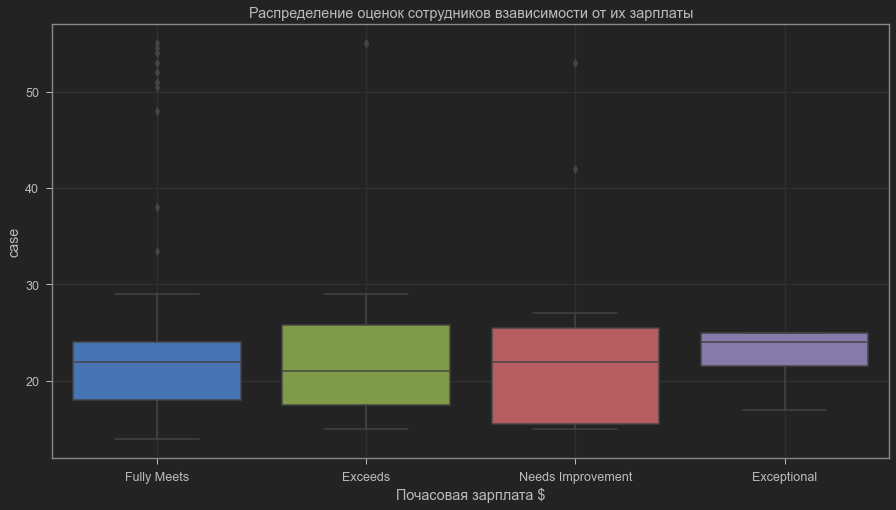

In [6]:
production_staff = pd.read_sql('''SELECT CASE
                                  WHEN "Pay" = "Pay" THEN CAST("Pay" AS NUMERIC) END , 
                                  "Performance Score"
                                  FROM production_staff
                                  WHERE "Performance Score" IN ('Fully Meets', 'Needs Improvement', 'Exceeds', 'Exceptional')''' , connect)

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=production_staff, x='Performance Score', y='case')
plt.grid()
ax.set_title('Распределение оценок сотрудников взависимости от их зарплаты')
ax.set_xlabel('Почасовая зарплата $')

    Гипотеза: существует зависимость между оценкой работника и его зарплатой
Как можно заметить, это не так. Даже те, кто получает свыше сорока долларов в час имеют как и положительные оценки так и противоположные им.

Самую высокую оценку также получают сотрудники не с большей оплатой труда, а наоборот.

Text(0.5, 0.98, 'Зависимость оплаты труда в час от расы')

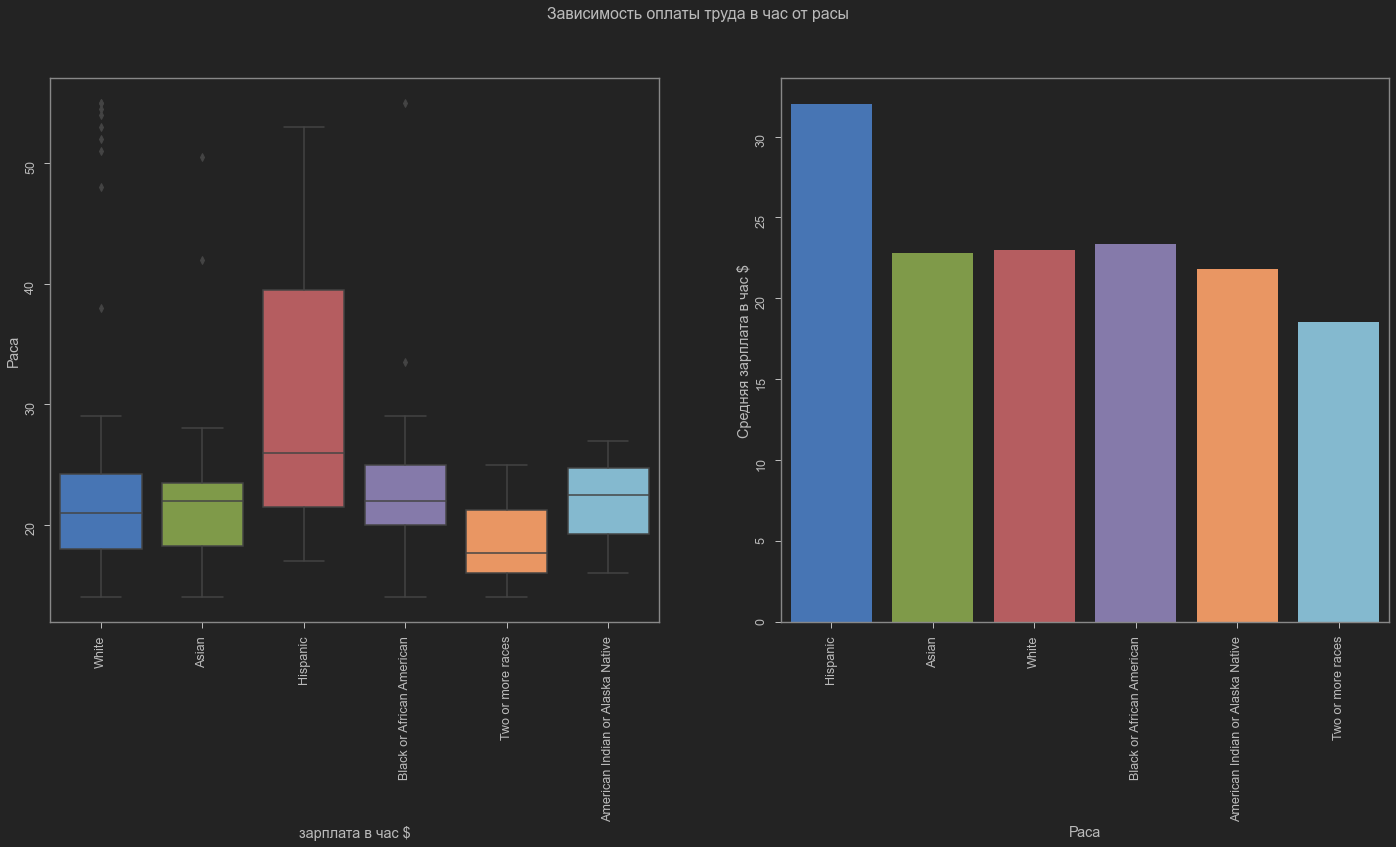

In [7]:
race_salary = pd.read_sql('''SELECT "Race Desc", CASE WHEN "Pay" = "Pay" THEN CAST("Pay" AS NUMERIC) END FROM production_staff''', connect)
race_mean_salary = pd.read_sql('''SELECT "Race Desc", AVG(CASE WHEN "Pay" = "Pay" THEN CAST("Pay" AS NUMERIC) END) AS mean FROM production_staff GROUP BY "Race Desc"''', connect)

fig, ax = plt.subplots(ncols=2,figsize=(24, 10))

sns.boxplot(data=race_salary, x='Race Desc', y="case", ax=ax[0])
ax[0].set_xlabel('зарплата в час $')
ax[0].set_ylabel('Раса')

sns.barplot(data=race_mean_salary, y='mean', x='Race Desc', orient='v', ax=ax[1])
ax[1].set_ylabel('Средняя зарплата в час $')
ax[1].set_xlabel('Раса')

ax[1].tick_params(rotation=90)
ax[0].tick_params(rotation=90)
fig.suptitle('Зависимость оплаты труда в час от расы')

    Гипотеза: есть корреляция между расой и зарплатой в час
Исходя из того, что представителей расы "White" значительно больше, чем остальных рас, может показаться, что зарпалты у них выше, это не так.

Если усреднить данные показатели можно заметить, что среднее зарплат примерно одинаково, за исключением расы "Hispanic" (в данном случае на показатель повлияло малое количество сотрудников с данной расой в компании)

Зависимость не выявлена

Text(0.5, 1.0, 'Распределение почасовой оплаты труда взависимости от количества жалоб')

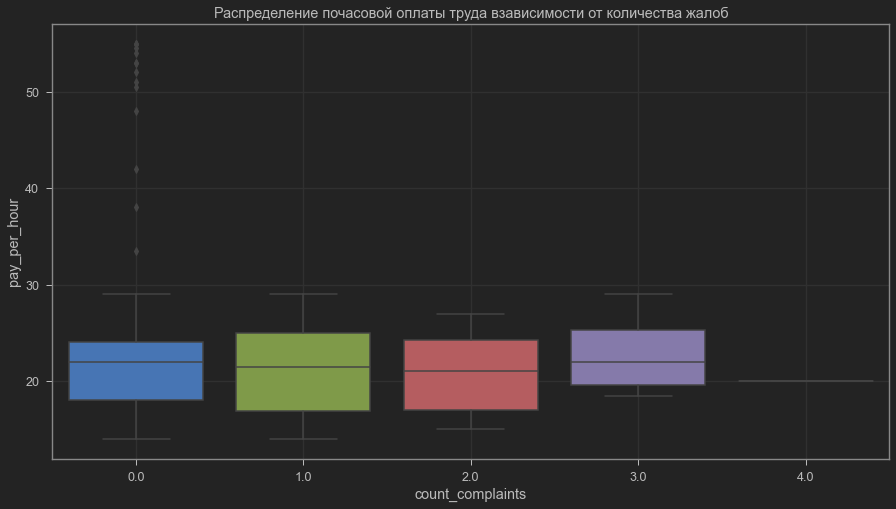

In [9]:
complaints_pay = pd.read_sql('''SELECT "90-day Complaints" AS count_complaints, CASE WHEN "Pay" = "Pay" THEN CAST("Pay" AS NUMERIC) END AS pay_per_hour FROM production_staff ''', connect)

plt.subplots(figsize=(15, 8))
sns.boxplot(data=complaints_pay, y='pay_per_hour', x='count_complaints')
# plt.yticks([0, 1, 2, 3, 4])
plt.grid()
plt.title('Распределение почасовой оплаты труда взависимости от количества жалоб')

    Зависимость оклада в час от количества жалоб
Данная зависимость действительно прослеживается. Среди тех, кто получил хотя бы одну жалобу, никто не получет больше 30 долларов в час. 

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


